In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.models import Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from PIL import Image

In [8]:
BASE_DIR = 'D:/projects/AI and ML/face recognition/UTKFace/'

In [9]:
# labels - age, gender, ethnicity
# example 1_0_0_20161219140623097.jpg.chip
# we extract 1_0, 1 as age[0,1] and 0 as gender[0,1]
image_paths = [] 
gender_labels = []

for filename in os.listdir(BASE_DIR):# loops through all images and returns their names
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')#we split name to get the first and second characters (1)_(0)_0_20161219140623097
    gender = int(temp[1])# assign second character to gender {0:'Male', 1:'Female'}
    #adding the ages and genders to respective lists
    image_paths.append(image_path)
    gender_labels.append(gender)

In [11]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['gender'] = image_paths, gender_labels
df.head()

,image,gender
0,D:/projects/AI and ML/face recognition/UTKFace...,0
1,D:/projects/AI and ML/face recognition/UTKFace...,0
2,D:/projects/AI and ML/face recognition/UTKFace...,1
3,D:/projects/AI and ML/face recognition/UTKFace...,1
4,D:/projects/AI and ML/face recognition/UTKFace...,1


<AxesSubplot:ylabel='count'>

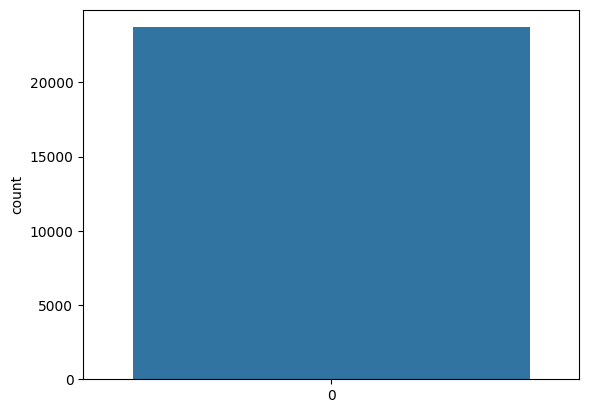

In [12]:
sns.countplot(df['gender'])

In [14]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True)#convert to black and white image fro accuracy
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)#convert image to array
        features.append(img)#add array converted image to list
        
    features = np.array(features)# transform features into arrays
    # prevention measure if using other forms rather than RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [15]:
X = extract_features(df['image'])

In [16]:
X.shape

(23708, 128, 128, 1)

In [19]:
# normalize the images
X = X/255.0

In [17]:
y_gender = np.array(df['gender'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y_gender,test_size= 0.2,shuffle= True, random_state= 42)

In [20]:
input_shape = (128, 128, 1)

In [22]:
inputs = Input((input_shape))


# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3),padding = 'same',strides=(1,1), 
kernel_regularizer = l2(0.001),activation='relu') (inputs)#creates a convolution kernel 
#that is convolved with the input layer to produce a tensor of outputs
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)# stores only pixels of the maximum value
#to downsize a large image size
conv_2 = Conv2D(64, kernel_size=(3, 3), padding = 'same',activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3),padding = 'same', activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3),padding = 'same', activation='softmax') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(64, activation='relu') (flatten)# ReLU helps to prevent the exponential growth in the computation

dropout_1 = Dropout(0.2) (dense_1)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)# dense deep neuronetwork layers


model = Model(inputs=[inputs], outputs=[output_1])#randomly selecting nodes to be dropped out with a given probability (20%)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])


In [23]:
# train model
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
593/593 [==============================] - 328s 551ms/step - loss: 0.6696 - accuracy: 0.5847 - val_loss: 0.6726 - val_accuracy: 0.6040
Epoch 2/30
 51/593 [=>............................] - ETA: 4:45 - loss: 0.6586 - accuracy: 0.6115

KeyboardInterrupt: 

In [ ]:
model.save('DreeNGzz.model')

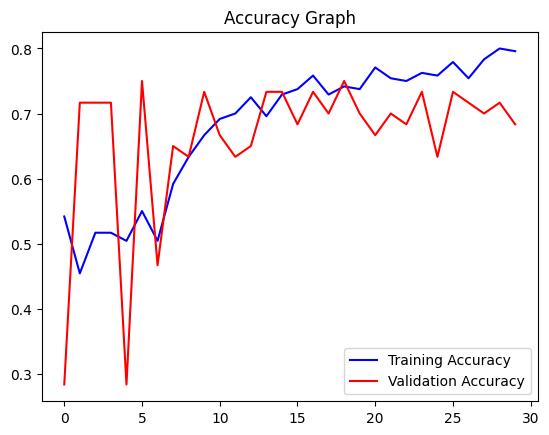

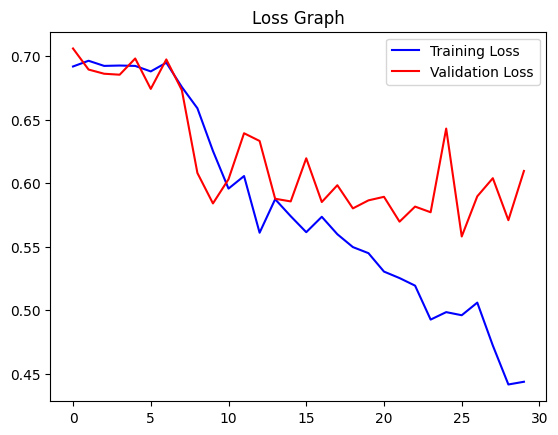

In [86]:
# plot results for gender
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
# !zip -r /content/DreeNGzz.zip /content/DreeNGzz.model